# Kochawave Fractal

Whilst browsing twitter the other day this tweet caught my eye about a variation on the famous [Koch curve](https://en.wikipedia.org/wiki/Koch_snowflake) fractal and I thought it would be fun to reproduce it in Python.

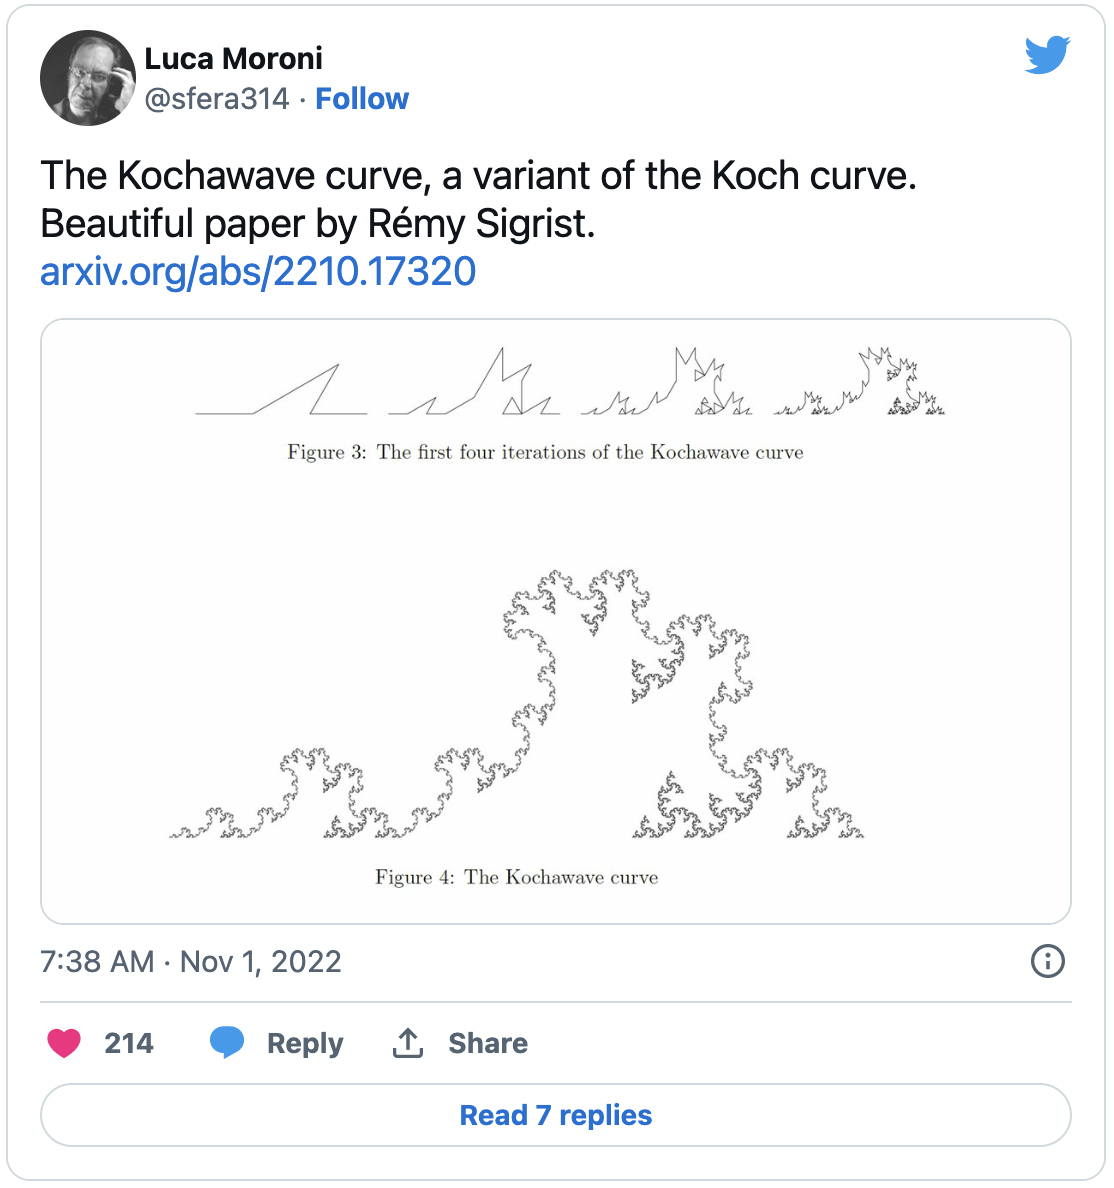

## Koch curve

The Koch curve generated by taking a straight line and dividing it into three equal lengths. The middle length is removed and replaced with two lengths which form two sides of an equilateral triangle. 

![](../images/koch_curve.svg)

So if $L$ is one third the length of the current line segment $\overrightarrow{AD}$ then we need to do the following for each line segments in the current curve:

- Add a line segment starting at $A$ with length $L$ (line $\overrightarrow{AB}$);
- Turn $60^\circ$ to the left and add a line segment of length $L$ (line $\overrightarrow{BC}$);
- Turn $120^\circ$ to the right and add a line segment of length $L$ (line $\overrightarrow{CD}$);
- Turn $60^\circ$ to the left and add a line segment of length $L$ (line $\overrightarrow{DE}$).

To use Python to generate the Koch curve we first need to import functions to calculate sine, cosine and the square root of a number (this isn't needed for the Koch curve but we will be using it later so might as well import it now) as well as conversion from degrees to radians.

In [1]:
from math import sin, cos, radians, sqrt
import matplotlib.pyplot as plt

Since the Koch curve is generated by applying the same rules to each line segment and this is done many times we need to define the function `kochcurve()`. The inputs are

- `x` and `y` - lists that contain the coordinates of the endpoints of the line segments;
- `L` - the length of the current line segment;
- `angle` - the angle to the horizontal of the current line segment (e.g., 0 degrees is pointing horizontally to the right);
- `n` - the current stage.

This function makes calls to itself which is a programming technique called [recursion](https://en.wikipedia.org/wiki/Recursion_(computer_science)). It first checks to see whether the current stage number is zero, if so then it calculates the co-ordinates of the end point of the line segment and appends this to the `x` and `y` lists. If the currect stage number is not zero then if invokes the `kochcurve()` function for each of the four line segments that will be created (note that the stage number is decreased by 1).

In [2]:
def kochcurve(x, y, L, angle, n):
    if n == 0:
        # Add the end point co-ordinates to x and y lists
        x.append(x[-1] + L * cos(radians(angle)))
        y.append(y[-1] + L * sin(radians(angle)))
    else:
        L /= 3                           # calculate length of new line segments
        kochcurve(x, y, L, angle, n - 1) # add line A -> B
        angle += 60                      # turn 60 degrees to the left
        kochcurve(x, y, L, angle, n - 1) # add line B -> E
        angle -= 120                     # turn 120 degrees to the right
        kochcurve(x, y, L, angle, n - 1) # add line E -> C
        angle += 60                      # turn 60 degrees to the left
        kochcurve(x, y, L, angle, n - 1) # add line C -> D

Now that we have defined the function that calculates the co-ordinates of the vertices of the Koch curve all that is left to do is generate and plot the curve.

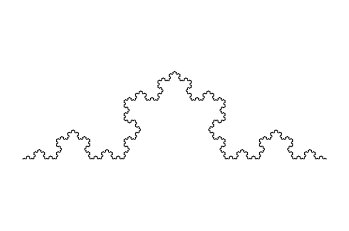

In [3]:
# Generate Koch curve 
n = 6                     # number of stages the curve is generated
x, y = [0], [0]           # starting co-ordinates
kochcurve(x, y, 1, 0, 6)

# Plot curve
def plot_curve(x, y):
    fig, ax = plt.subplots()
    plt.plot(x, y, "k", lw=0.5)
    plt.axis("equal")
    plt.axis("off")
    plt.show()

plot_curve(x, y)

### The Koch snowflake

The Koch snowflake fractal is produced by applying the rules for generating the Koch curve to three sides of an equilateral triangle. The code below calculates the Koch curve three times using angles 0$^\circ$, -120$^\circ$ and 120$^\circ$. 

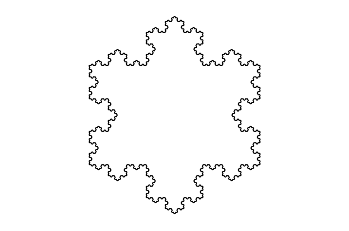

In [4]:
# General Koch snowflake
L, angle = 1, 0
n = 6
x, y = [0], [0]
kochcurve(x, y, L, 0, n)
kochcurve(x, y, L, -120, n)
kochcurve(x, y, L, 120, n)

# Plot curve
plot_curve(x, y)

## The Kochwave curve

The Kochawave curve is generated in a similar way to the Koch curve but instead of replacing the middle line segment with two lines of equal length, it is replaces by two lines that meet at a point which is the top vertex of an equilateral triangle with the base is the last line segment. 

![](../images/kochawave_curve.svg)

Let $L$ be a third of the length of the current line segment, then using Pythagoras the length of the side opposite point $D$ in $\triangle CDE$ is 

$$\sqrt{L^2 - \left(\frac{L}{2}\right)^2} = \sqrt{\frac{3}{4}L^2} = \frac{\sqrt{3}}{2}L.$$

So $\angle CBE = \tan^{-1} \left( \frac{ \sqrt{3}L/2 }{3L/2} \right) = 30^\circ$ and $\angle CDE = \tan^{1} \left( \frac{\sqrt{3}L/2}{L/2} \right) = 60^\circ$. Finally using Pythagoras gives $\overrightarrow{BC} = \sqrt{\left( 3L/2 \right)^2 + \left( \sqrt{3}L/2 \right)^2} = \sqrt{3}L$

So the steps for the Kochawave curve are

- Add line segment starting at $A$ with length $L$ (line $\overrightarrow{AB}$);
- Turn 30$^\circ$ to the left and add line segment of length $\sqrt{3} L$ (line $\overrightarrow{BC}$);
- Turn 150$^\circ$ to the right and add line segment of length $L$ (line $\overrightarrow{CD}$);
- Turn 120$^\circ$ to the left and add line segment of length $L$ (line $\overrightarrow{DE}$).

The Kochawave curve is a variation on the Koch curve seen above so we can draw the Kochawave curve by making some small changes to the `kochcurve()` function.

In [5]:
def kochawave(x, y, L, angle, n):
    if n == 0:
        x.append(x[-1] + L * cos(radians(angle)))
        y.append(y[-1] + L * sin(radians(angle)))
    else:
        L /= 3
        kochawave(x, y, L, angle, n - 1)
        angle += 30
        kochawave(x, y, sqrt(3) * L, angle, n - 1)
        angle -= 150
        kochawave(x, y, L, angle, n - 1)
        angle += 120
        kochawave(x, y, L, angle, n - 1)   

Plotting the Kochawave curve up to stage 8

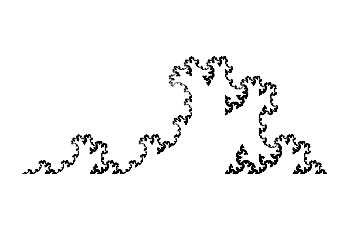

In [6]:
# Generate Kochawave curve 
L, angle = 1, 0
n = 8
x, y = [0], [0]
kochawave(x, y, L, angle, n)

# Plot curve
plot_curve(x, y)

### The Kochawave triangle

The Kochawave curve tesselates to for an equilateral triangle. The code below generates three separate Kochawave curves using initial angles 0$^\circ$, 120$^\circ$ and 240$^\circ$ and plots the regions bounded by the curves using different colours.

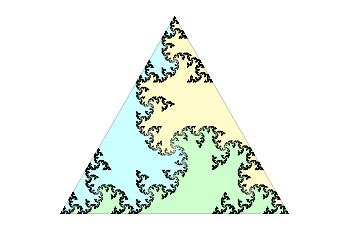

In [7]:
# General Kochawave triangle
L, angle = 1, 0
n = 8
x1, y1 = [0], [0]
kochawave(x1, y1, L, angle, n)
x2, y2 = [x1[-1]], [y1[-1]]
kochawave(x2, y2, L, angle + 120, n)
x3, y3 = [x2[-1]], [y2[-1]]
kochawave(x3, y3, L, angle + 240, n)

# Plot curves
fig, ax = plt.subplots()
plt.fill(x1, y1, fc="#CCFFCC", ec = "k", lw=0.2)
plt.fill(x2, y2, fc="#FFFCCC", ec = "k", lw=0.2)
plt.fill(x3, y3, fc="#CCFFFF", ec = "k", lw=0.2)
plt.axis("equal")
plt.axis("off")
plt.show()